<a href="https://www.kaggle.com/code/saifuddinrakib/titanic-machine-learning?scriptVersionId=163901850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

I drew inspirations from the following notebooks in the making of this notebook:
- [Titanic Data Exploratory Analysis](https://github.com/chongjason914/kaggle-titanic/) by [Jason Chong](https://github.com/chongjason914/)
- [Titanic Top 4% With Emsemble Modelling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling) by [Yassin Ghouzam](https://www.kaggle.com/yassineghouzam)
    

In [1]:
#Data Wrangling

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
from collections import Counter

#Data Visulaization

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer  # Fixing typo: Simplelmputer to SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  # Fixing typo: RandomForestC1assif1er to RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # Fixing typo: DecisionTreeC1assifier to DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  # Fixing typo: KNeighborsC1assifier to KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  # Fixing typo: Gauss1anNB to GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/data-explorer/train.csv
/kaggle/input/data-explorer/test.csv
/kaggle/input/data-explorer/gender_submission.csv


In [2]:
# Assuming our dataset is a CSV file named 'train.csv'
train_data = pd.read_csv('/kaggle/input/data-explorer/train.csv')
test_data = pd.read_csv('/kaggle/input/data-explorer/test.csv')
ss = pd.read_csv('/kaggle/input/data-explorer/gender_submission.csv')

# Exploratory Data Analysis

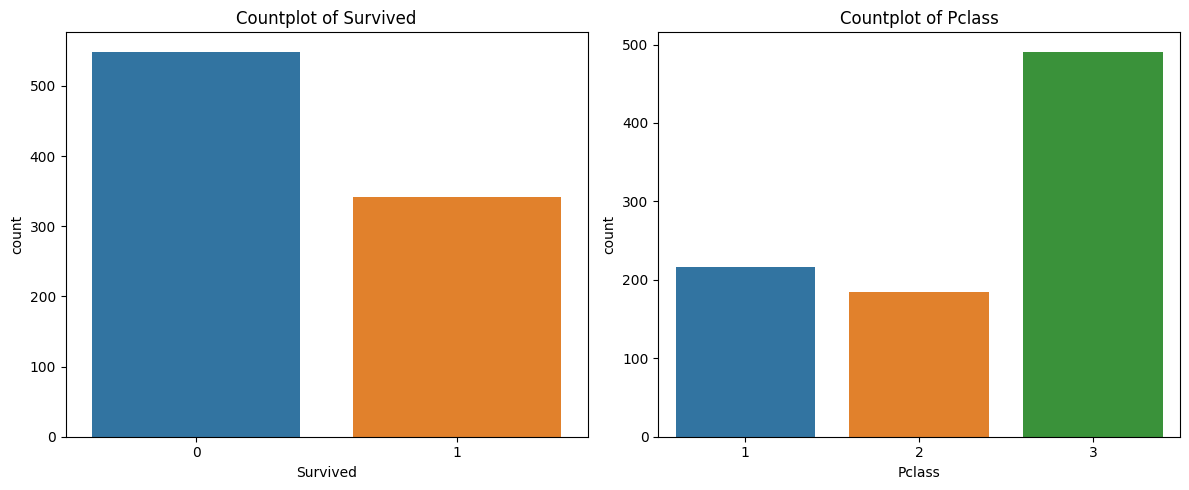

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame named 'train_data'
# Example: train_data = pd.read_csv('your_dataset.csv')

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot for 'Survived'
sns.countplot(data=train_data, x='Survived', ax=axes[0])
axes[0].set_title('Countplot of Survived')

# Countplot for 'Pclass'
sns.countplot(data=train_data, x='Pclass', ax=axes[1])
axes[1].set_title('Countplot of Pclass')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


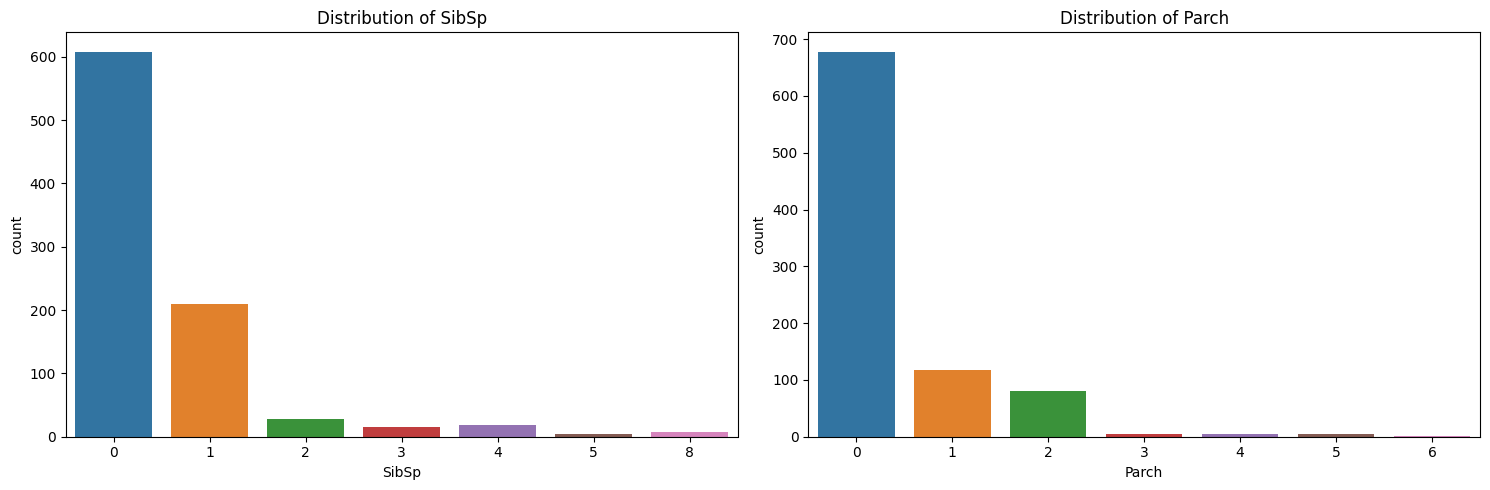

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=train_data, x='SibSp', ax=axes[0])
axes[0].set_title('Distribution of SibSp')

sns.countplot(data=train_data, x='Parch', ax=axes[1])
axes[1].set_title('Distribution of Parch')

plt.tight_layout()
plt.show()

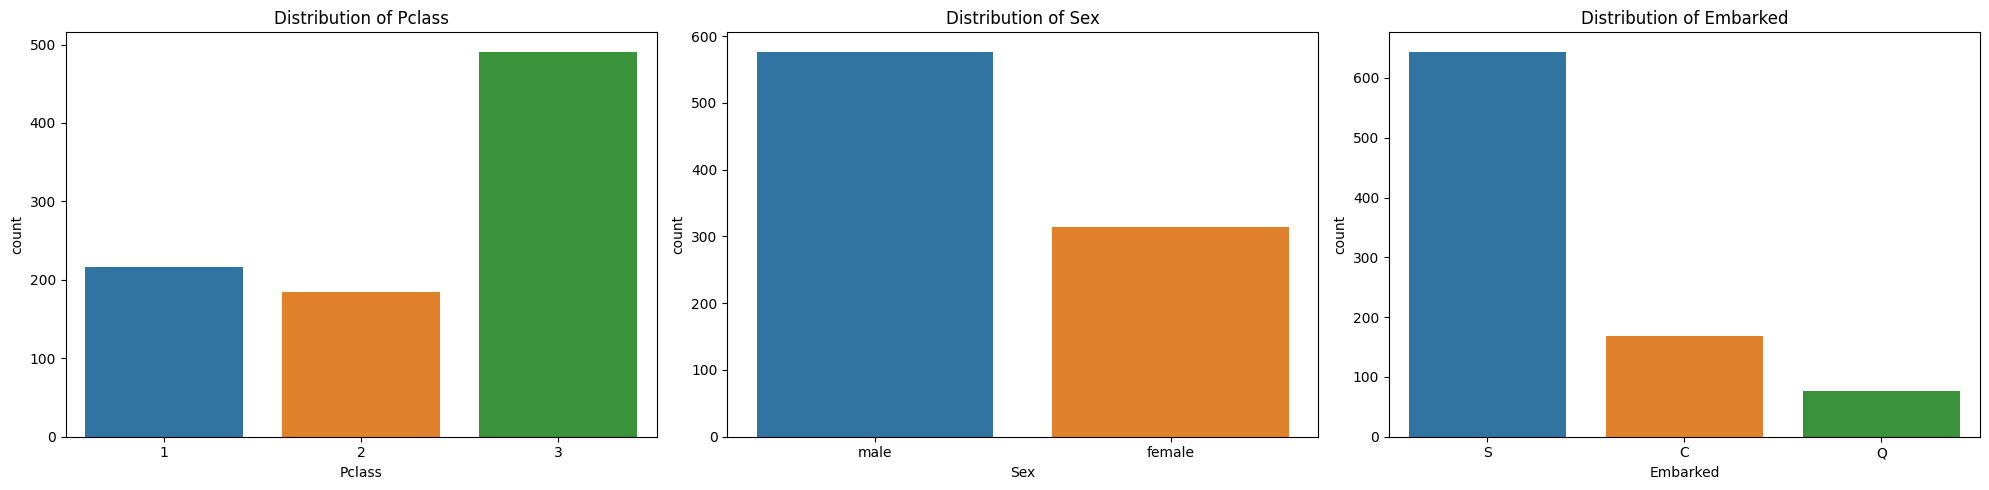

In [5]:
# Cell 3: Distribution of 'Pclass', 'Sex', and 'Embarked'
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(data=train_data, x='Pclass', ax=axes[0])
axes[0].set_title('Distribution of Pclass')

sns.countplot(data=train_data, x='Sex', ax=axes[1])
axes[1].set_title('Distribution of Sex')

sns.countplot(data=train_data, x='Embarked', ax=axes[2])
axes[2].set_title('Distribution of Embarked')

plt.tight_layout()
plt.show()

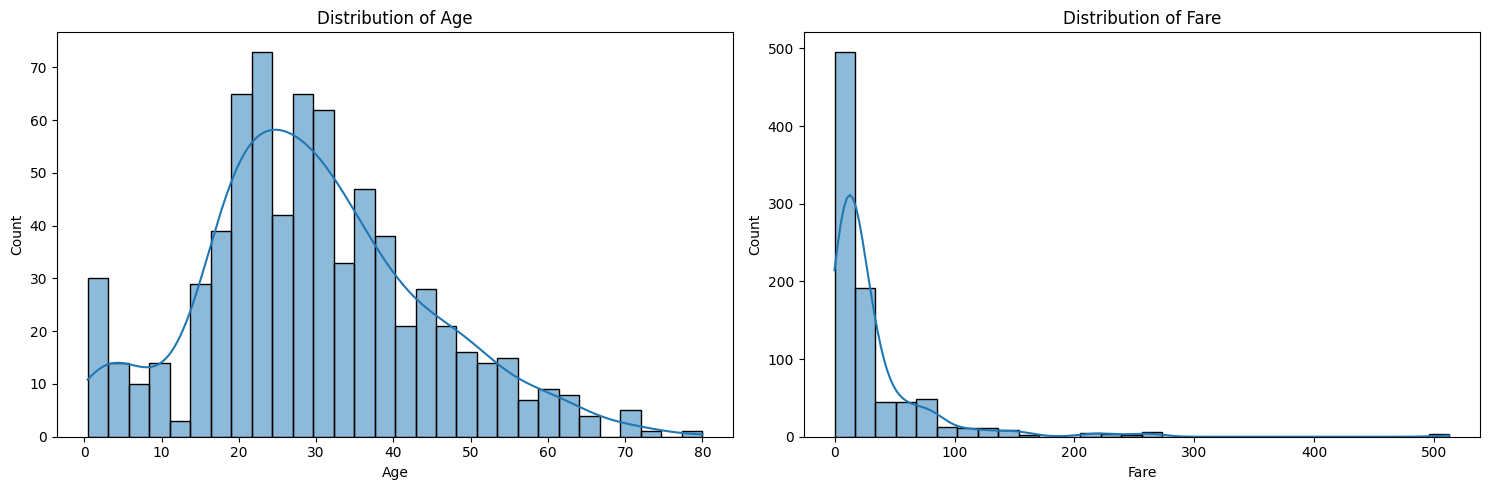

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=train_data, x='Age', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')

sns.histplot(data=train_data, x='Fare', bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fare')

plt.tight_layout()
plt.show()

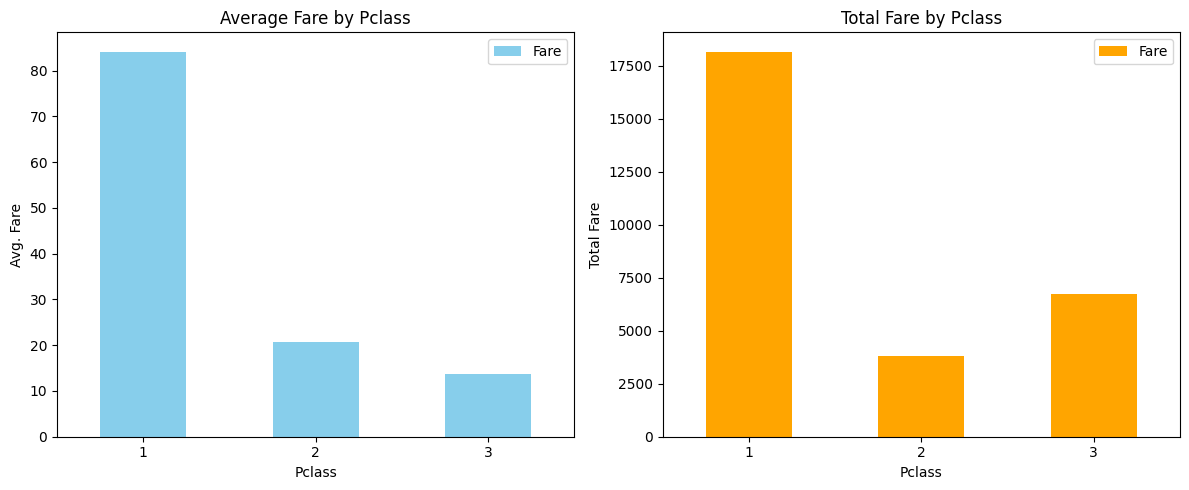

In [7]:

# Assuming you have loaded your training dataset into a DataFrame named 'train_data'
# Example: train_data = pd.read_csv('train_dataset.csv')

# Calculate average fare by Pclass
class_avg_fare = train_data.pivot_table(index='Pclass', values='Fare')
# Calculate total fare by Pclass
class_total_fare = train_data.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Barplot for average fare by Pclass
class_avg_fare.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average Fare by Pclass')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Avg. Fare')
axes[0].tick_params(axis='x', rotation=0)

# Barplot for total fare by Pclass
class_total_fare.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Fare by Pclass')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Total Fare')
axes[1].tick_params(axis='x', rotation=0)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


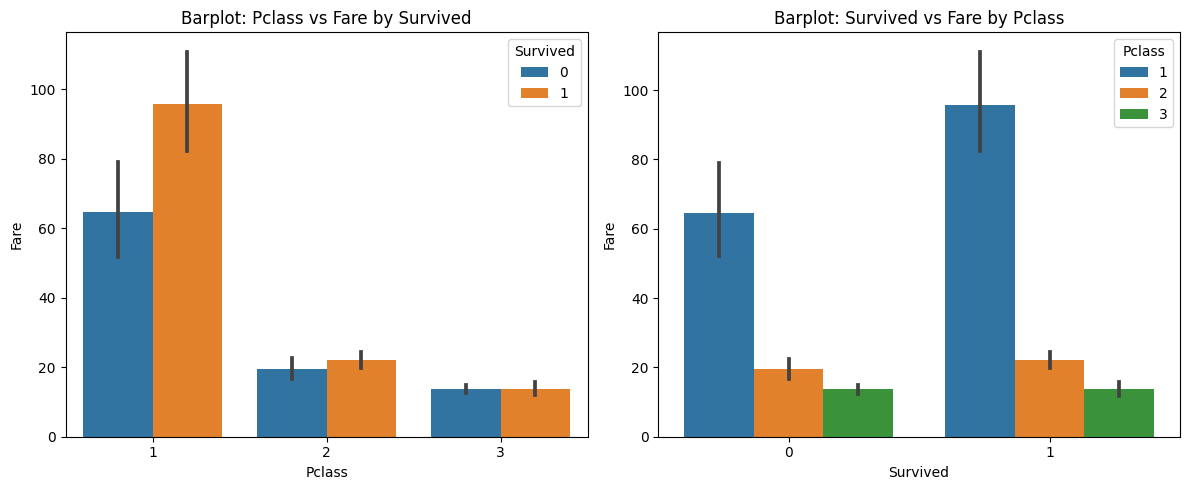

In [8]:

# Assuming you have loaded your training dataset into a DataFrame named 'train_data'
# Example: train_data = pd.read_csv('train_dataset.csv')

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Barplot for 'Pclass' and 'Fare' by 'Survived'
sns.barplot(data=train_data, x='Pclass', y='Fare', hue='Survived', ax=axes[0])
axes[0].set_title('Barplot: Pclass vs Fare by Survived')

# Barplot for 'Survived' and 'Fare' by 'Pclass'
sns.barplot(data=train_data, x='Survived', y='Fare', hue='Pclass', ax=axes[1])
axes[1].set_title('Barplot: Survived vs Fare by Pclass')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


# Importing data and read 

Training data-890
, Testing data-417


In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
print("Train Data set shape",train_data.shape)
print("Test Data set shape",test_data.shape)

Train Data set shape (891, 12)
Test Data set shape (418, 11)


Important Note: The test set is missing the 'Survived' column, as it serves as our target variable for analysis and prediction.
Our goal is to analyze the training set data and develop a model to predict the survival of passengers in the test set.
For model evaluation and submission, we will generate predictions and create a sample submission with the required format.


In [14]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
ss.shape

(418, 2)

The final submission dataframe should have 418 rows and 2 columns: 'PassengerId' and 'Survived'.



# 3. Data description
Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

* Survived: 0 = Did not survive, 1 = Survived

* Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

* Sex: Male or female

* Age: Age in years, fractional if less than 1

* SibSp: Number of siblings or spouses aboard the titanic

* Parch: Number of parents or children aboard the titanic

* Ticket: Passenger ticket number

* Fare: Passenger fare

* Cabin: Cabin number

* Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

# Data types, Missing data and summary of Statistics

In [16]:
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [17]:
#Missing training data in columns
train_data.isnull().sum().sort_values (ascending =False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [18]:
#Missing test data in columns
test_data.isnull().sum().sort_values (ascending =False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Here *'Age', 'Cabin' and 'Embarked'* columns in the training set have missing data while *'Age', 'Fare' and 'Cabin'* in the set set have missing data. 

<Axes: >

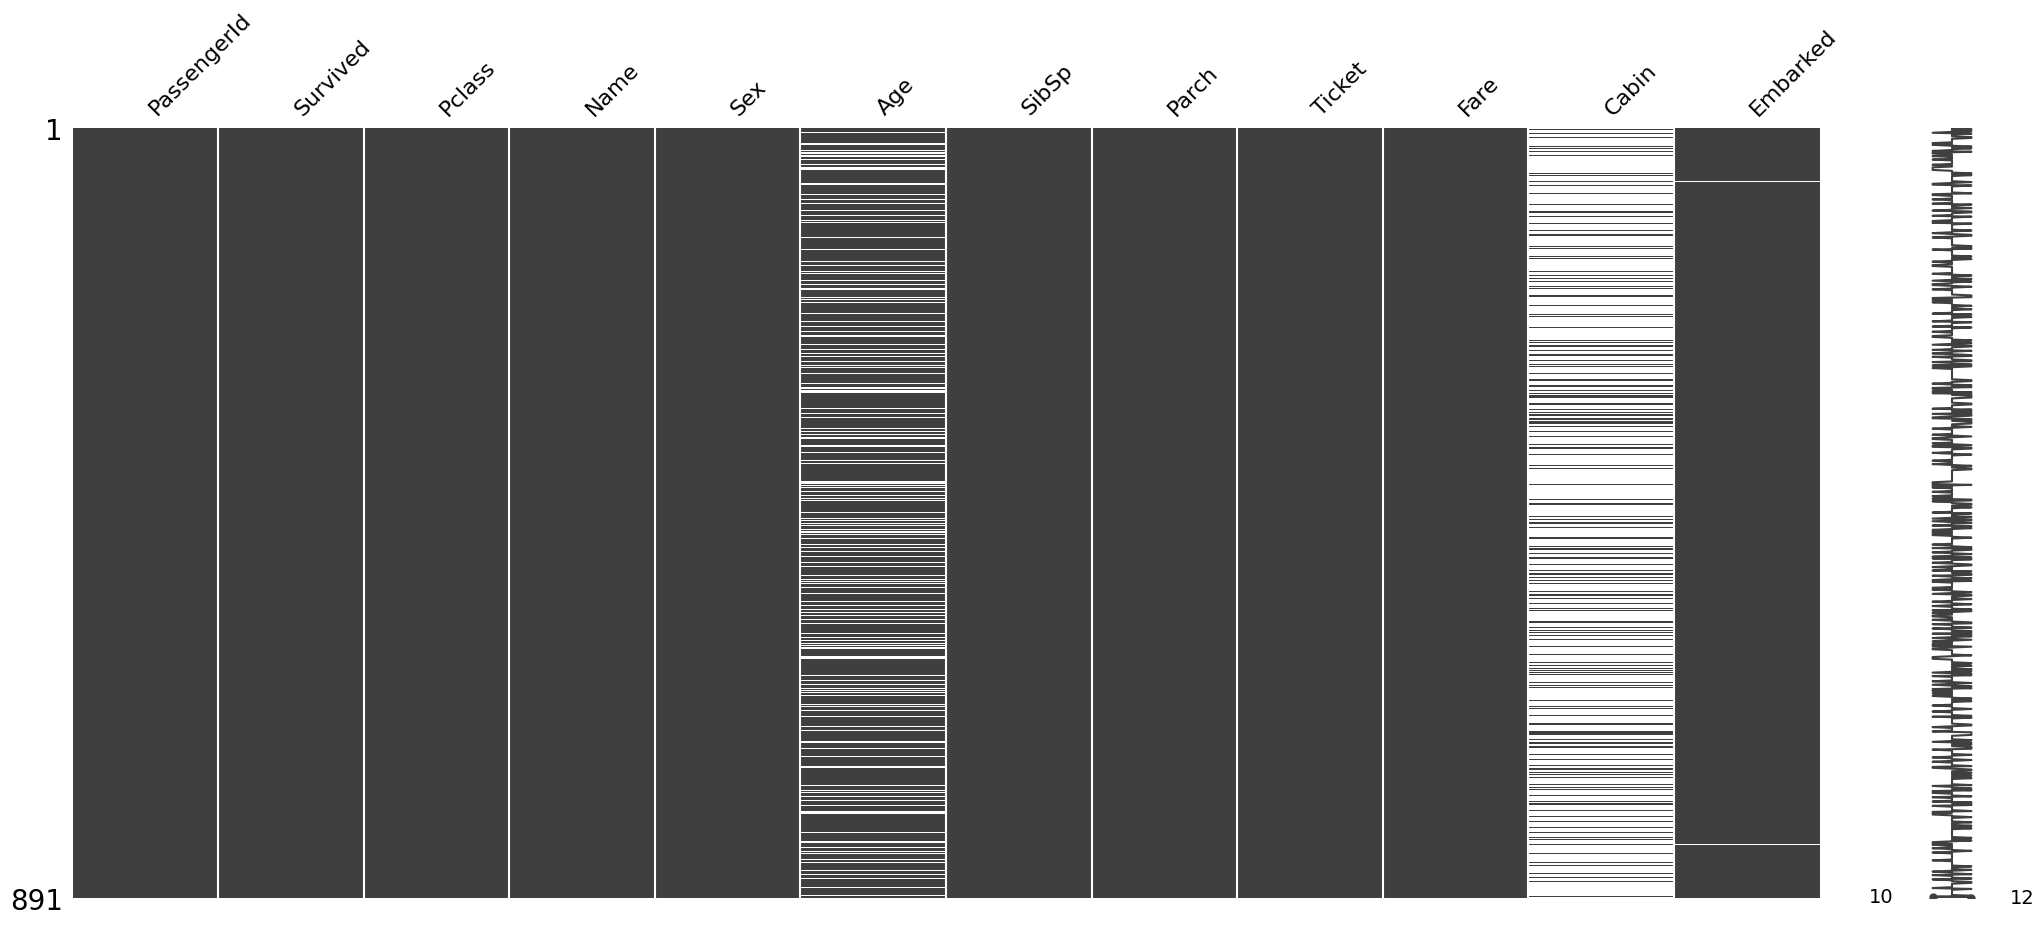

In [19]:
import missingno
# Assuming train_data is your DataFrame containing training data
missingno.matrix(train_data)

<Axes: >

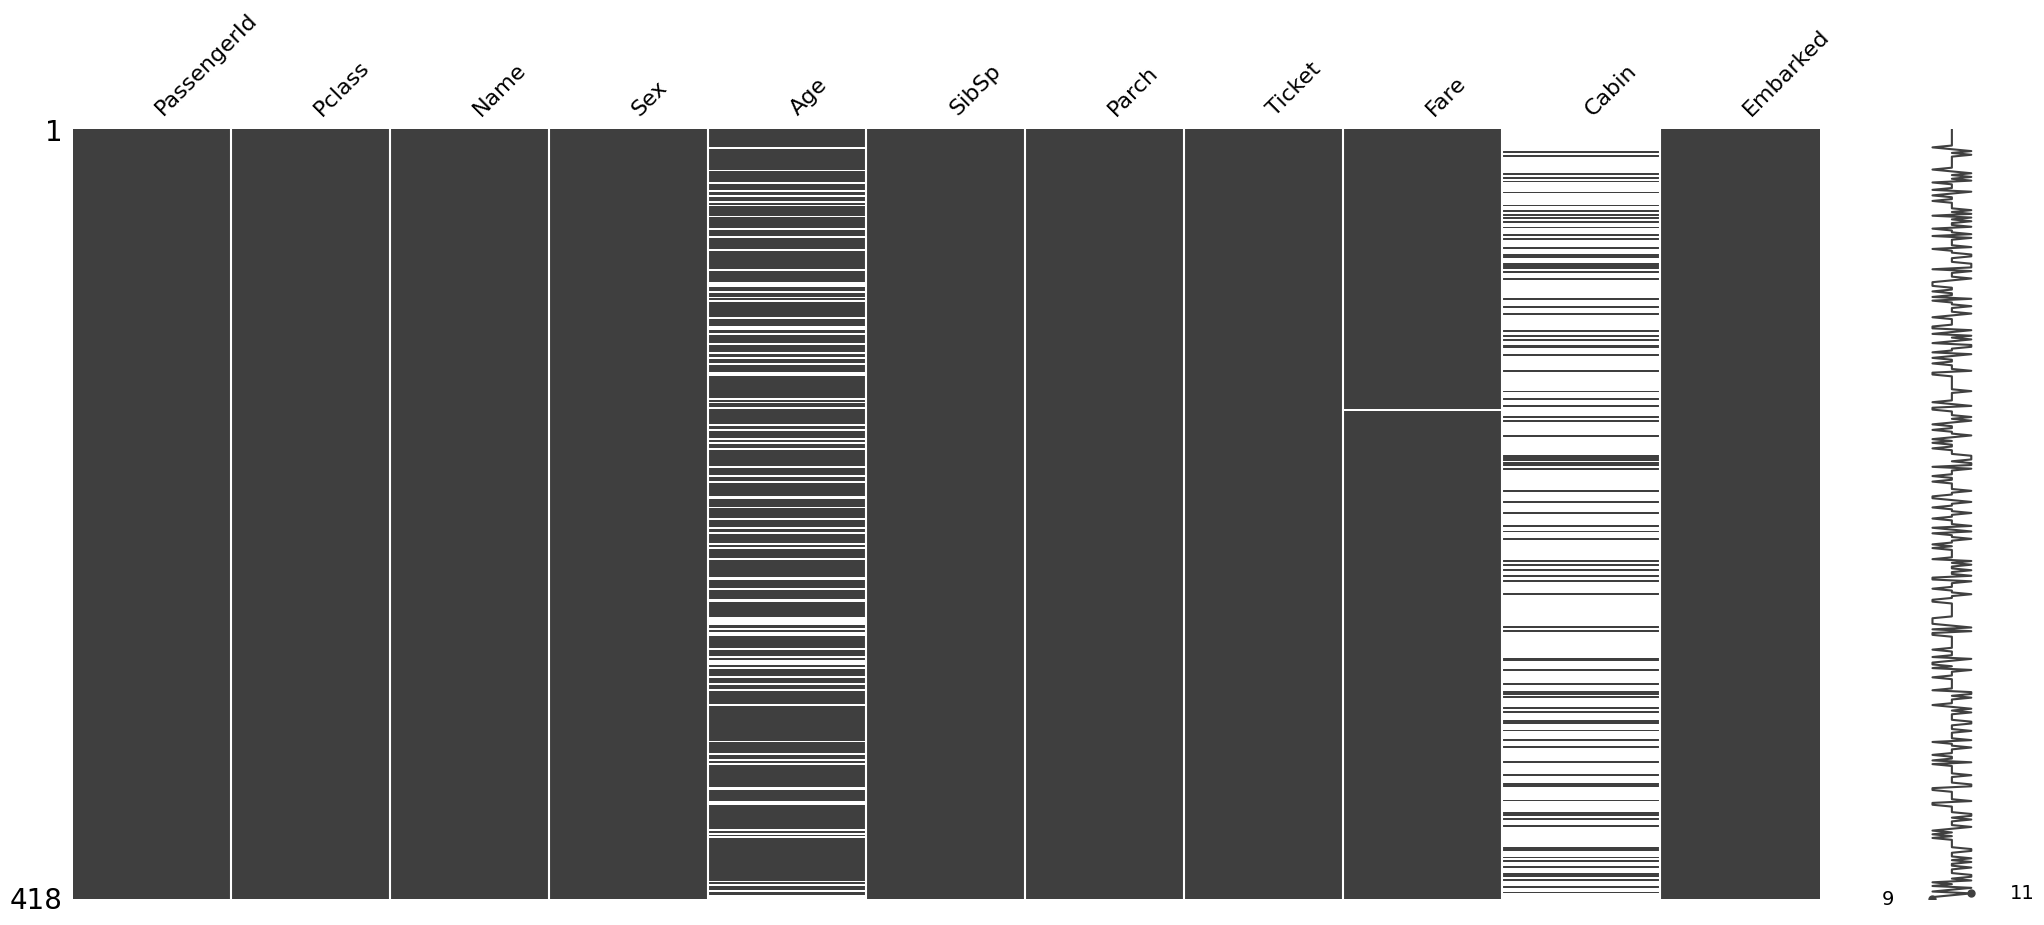

In [20]:
import missingno

# Assuming train_data is your DataFrame containing training data
missingno.matrix(test_data)


In [21]:
#Summary Statistics for training data set
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
#Summary Statistics for test data set
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Feature analysis

**Categorical variable: Sex**

In [24]:

train_data['Sex'].value_counts(dropna=False)

#comment: More male passengers than female

Sex
male      577
female    314
Name: count, dtype: int64

In [25]:
#Mean of Survival by Sex
train_data[['Sex','Survived']].groupby ('Sex', as_index=False).mean().sort_values(by='Survived', ascending= False)

#comment: More male passengers than female

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

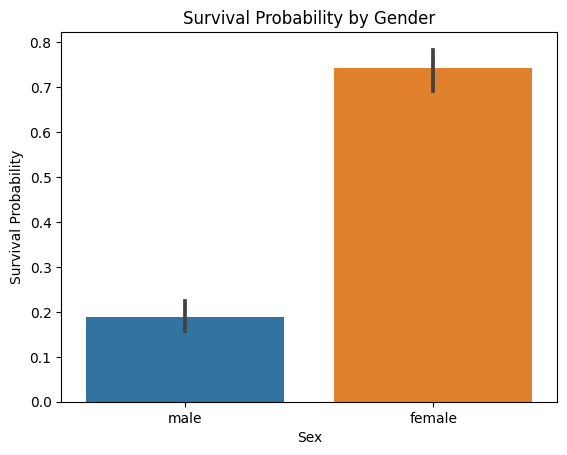

In [26]:
sns.barplot (x= 'Sex', y='Survived', data= train_data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Gender")

**Cateforical Variable: Pclass**

In [27]:

train_data['Pclass'].value_counts(dropna=False)

#comment: More male passengers than female

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [28]:
#Mean of Survival by Sex
train_data[['Pclass','Survived']].groupby ('Pclass', as_index=False).mean().sort_values(by='Survived', ascending= False)

#comment: More male passengers than female

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

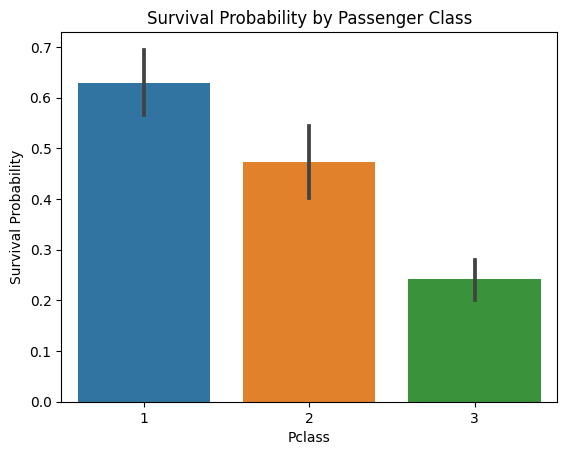

In [29]:
sns.barplot (x= 'Pclass', y='Survived', data= train_data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Passenger Class")

Text(0.5, 1.0, 'Survival Probability by Sex & Passenger Class')

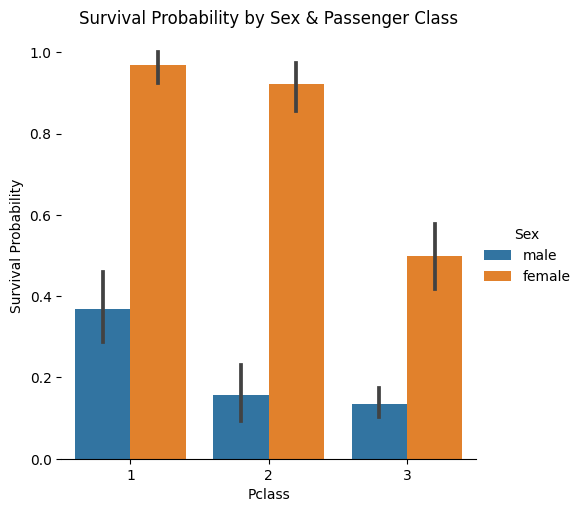

In [30]:
g=sns.catplot(x='Pclass',y='Survived', hue= 'Sex', data= train_data, kind= 'bar')
g.despine(left= True)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Sex & Passenger Class")

**Categorical Variable: Embarked**

In [31]:
train_data['Embarked'].value_counts(dropna=False)

#comment: two missing value in the Embarked Column
 

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [32]:
#Mean of Survival by Sex
train_data[['Embarked','Survived']].groupby ('Embarked', as_index=False).mean().sort_values(by='Survived', ascending= False)

#comment: More male passengers than female

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Embarked')

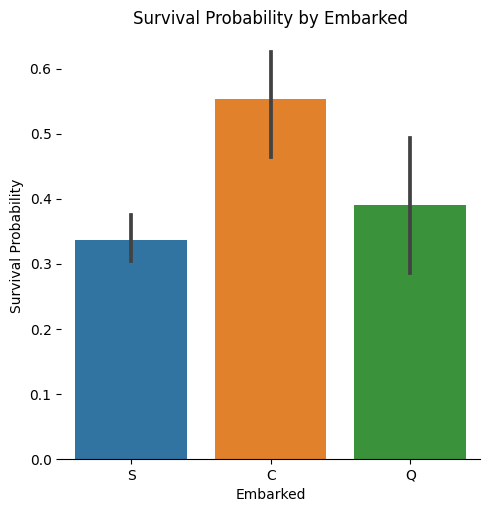

In [33]:
g=sns.catplot(x='Embarked',y='Survived',  data= train_data, kind= 'bar')
g.despine(left= True)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Embarked")

Survival probability is highest in location **C** and lowest in location **S**.

Formulate a hypothesis whereby highest survival probability in location C is due to a majority of first-class passengers embarking there. Conversely, the lowest survival probability in location S could be linked to a higher proportion of third-class passengers

Let us now test this hypothesis

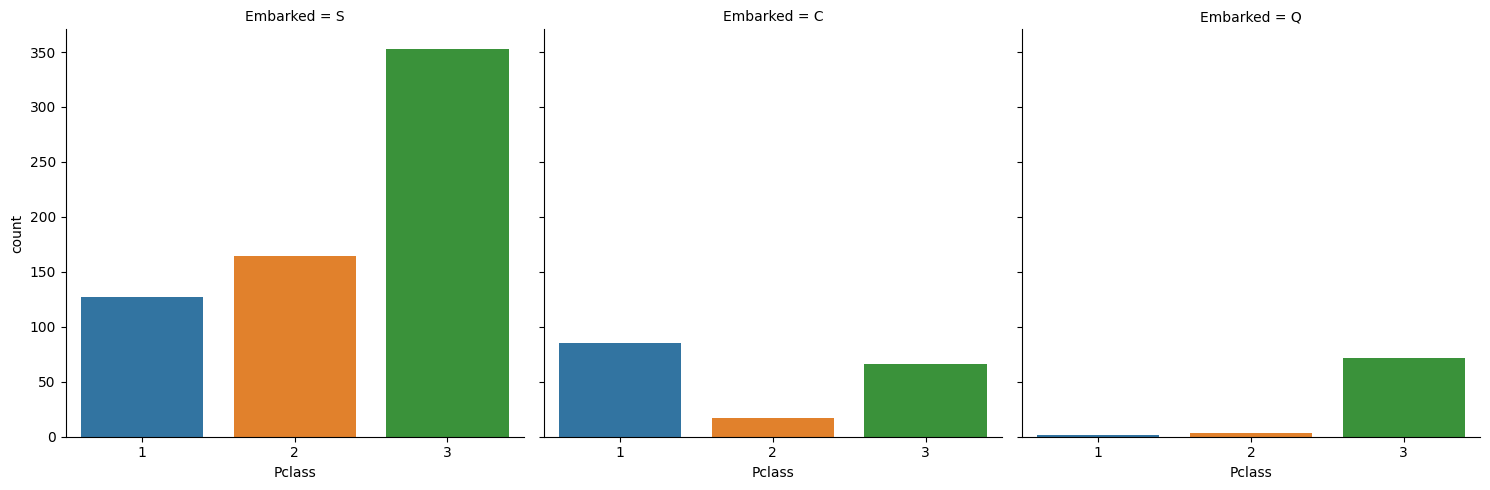

In [34]:
import seaborn as sns

# Assuming train is your DataFrame
sns.catplot(x='Pclass', col='Embarked', data=train_data, kind='count')


Our hypothesis appears to be true. Location S has the most third class passengers whereas location C has the most first class passengers.

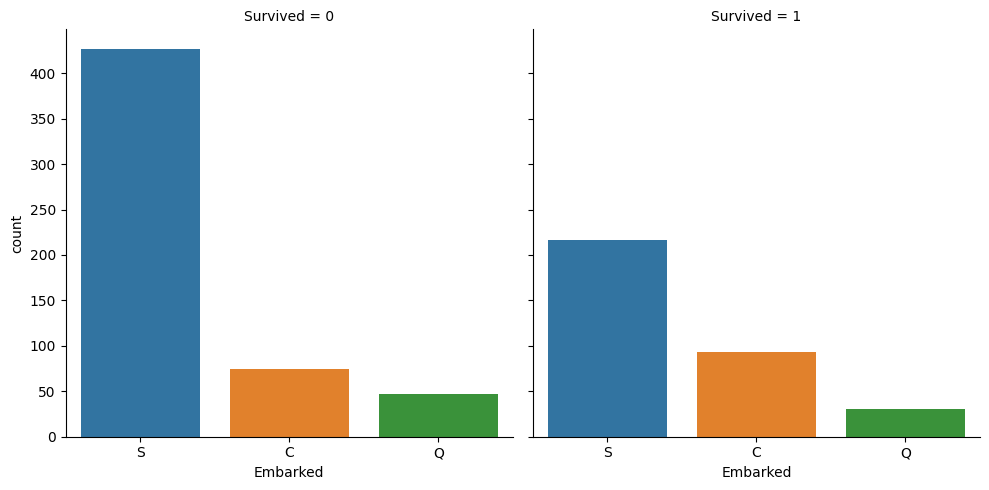

In [35]:
# Visualizing the count of passengers' survival status based on their embarkation location
sns.catplot(x='Embarked', col='Survived', data=train_data, kind='count')

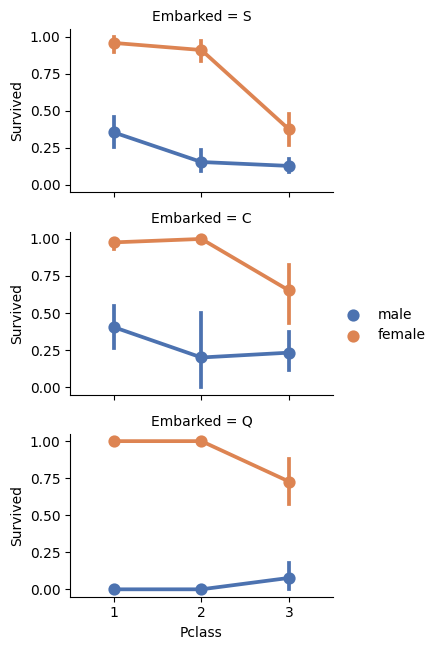

In [36]:
#Survival probability by all categorical variables

grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1, 2, 3], hue_order=['male', 'female'])
grid.add_legend()

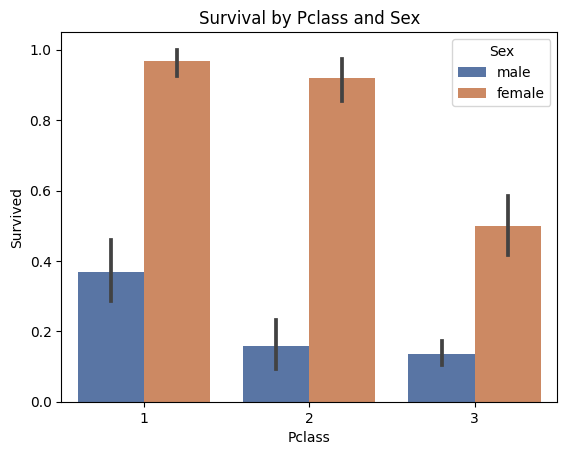

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data, palette='deep')
plt.title('Survival by Pclass and Sex')
plt.show()


# Numerical variables
Numerical variables in our dataset are SibSp, Parch, Age and Fare.
**Detect and remove outliers in numerical variables**


In [38]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train_data, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [39]:
# Outliers in numerical variables

train_data.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [40]:
# Drop outliers and reset index
print("Before: {} rows".format(len(train_data)))
train_data = train_data.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print("After: {} rows".format(len(train_data)))

Before: 891 rows
After: 881 rows


In [41]:
# Check for missing values after outlier detection
missing_values_after_outliers = train_data.isnull().sum()
print("Missing Values After Outlier Detection:\n", missing_values_after_outliers)

Missing Values After Outlier Detection:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64


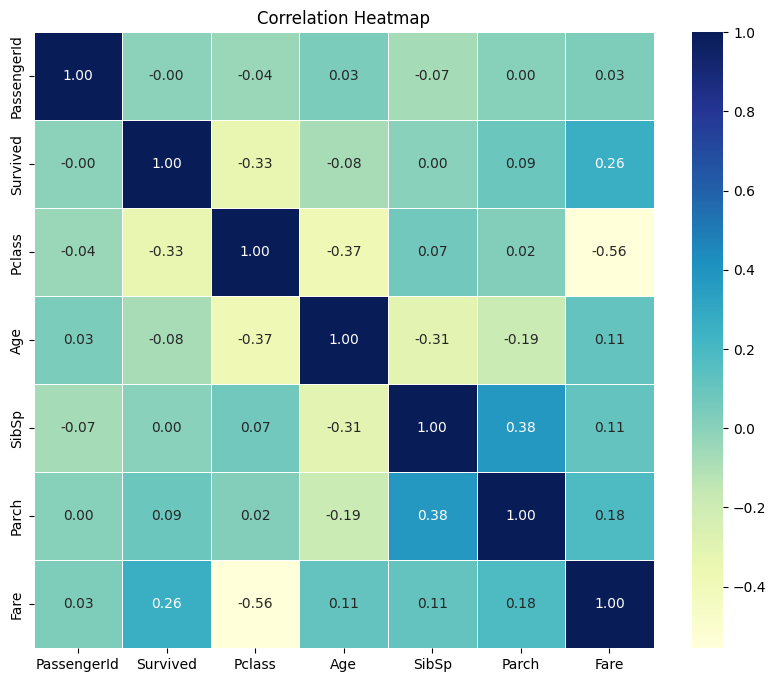

In [42]:

# Assuming you have a DataFrame called 'train_data'
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


This code computes the correlation matrix for all numeric features in the entire DataFrame train_data and creates a heatmap to visualize the correlations. 

<Axes: >

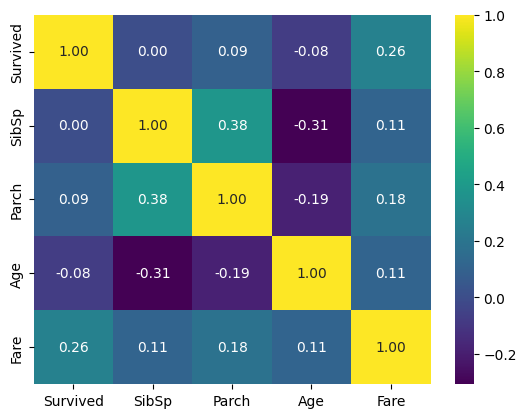

In [43]:
sns.heatmap(train_data[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap =  'viridis')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

From 0.26 indicated the higher fare have higher survival rate

This code specifically selects a subset of features ('Survived', 'SibSp', 'Parch', 'Age', 'Fare') from the DataFrame train and computes the correlation matrix for this selected subset

**Numerical variable: SibSp**


In [44]:
# Value counts of the SibSp column 

train_data['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [45]:
#Mean of Survival by Sex
train_data[['SibSp','Survived']].groupby ('SibSp', as_index=False).mean().sort_values(by='Survived', ascending= False)

#comment: More male passengers than female

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


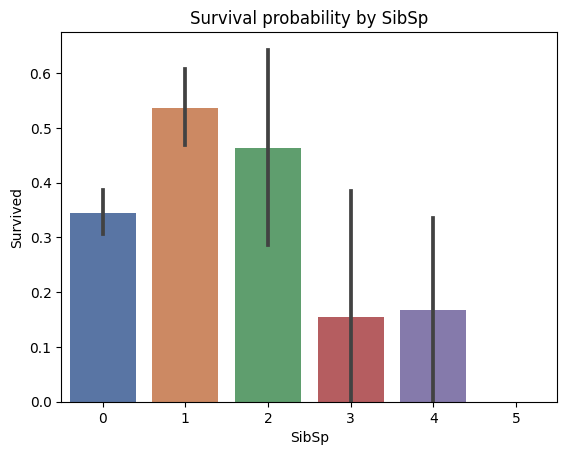

In [46]:
# Assuming train_data is your DataFrame
sns.barplot(x='SibSp', y='Survived', data=train_data, palette='deep')
plt.title('Survival probability by SibSp')
plt.show()

**Numerical variable: Parch**


In [47]:
# Value counts of the SibSp column 

train_data['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [48]:
#Mean of Survival by Sex
train_data[['Parch','Survived']].groupby ('Parch', as_index=False).mean().sort_values(by='Survived', ascending= False)

#comment: More male passengers than female

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


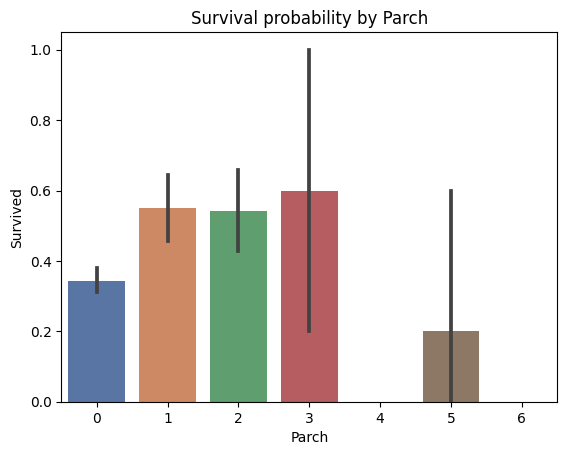

In [49]:
# Assuming train_data is your DataFrame
sns.barplot(x='Parch', y='Survived', data=train_data, palette='deep')
plt.title('Survival probability by Parch')
plt.show()

In [50]:
train_data['Age'].isnull().sum()

170

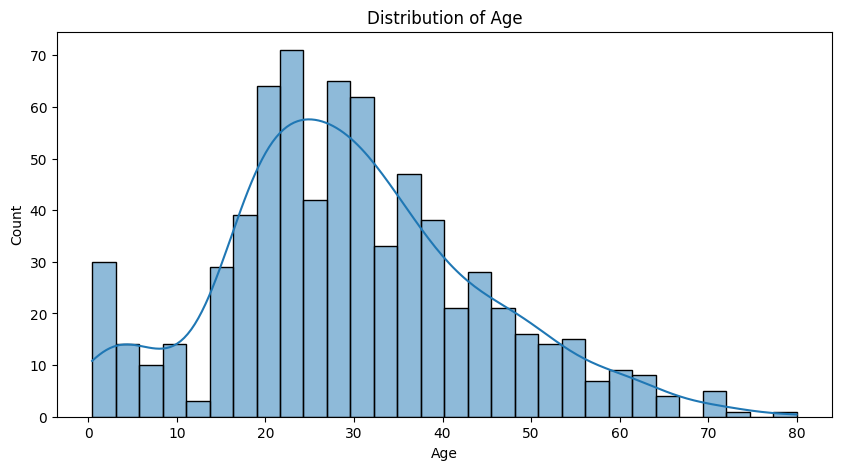

In [51]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_data, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

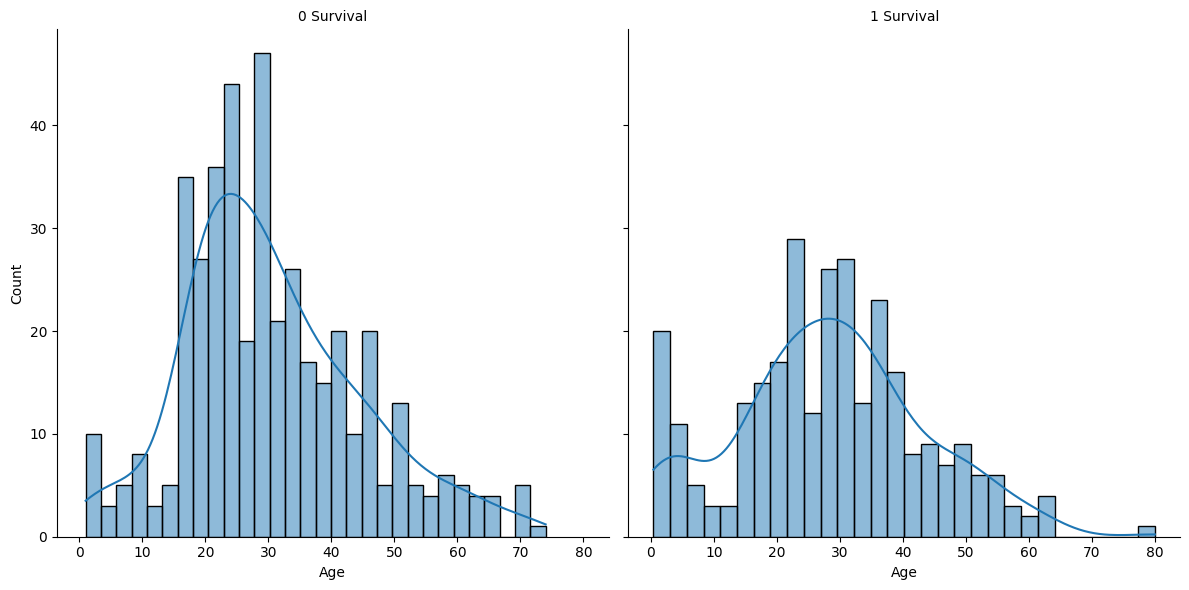

In [52]:
# Age distribution by survival
g = sns.FacetGrid(train_data, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=30, kde=True)
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template="{col_name} Survival")
plt.show()

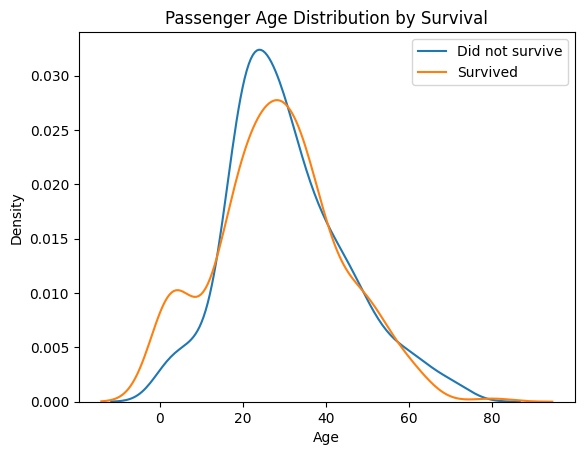

In [53]:
sns.kdeplot(train_data.loc[train_data['Survived'] == 0, 'Age'], label='Did not survive')
sns.kdeplot(train_data.loc[train_data['Survived'] == 1, 'Age'], label='Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')
plt.legend()  # Add this line to display the legend

Text(0, 0.5, 'Passenger Fare Distribution')

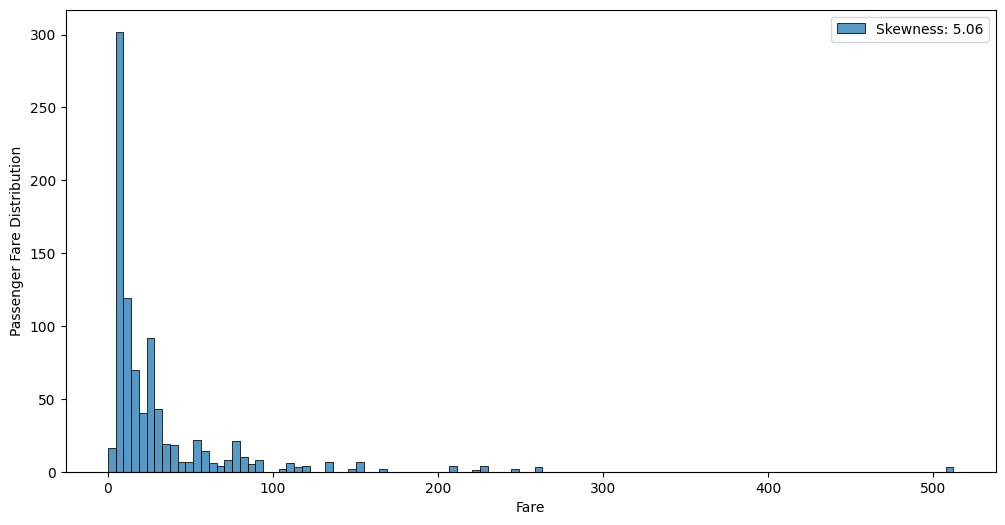

In [54]:
#Passenger fare distrubution
plt.figure(figsize=(12, 6))
sns.histplot (train_data['Fare'], label = 'Skewness: %.2f'% (train_data['Fare'].skew()))
plt.legend(loc='best')
plt.ylabel('Passenger Fare Distribution')


Fare seems to nave a hign skewness we will address this issue later on in me noteb00K via log transformation

Encoding Categorical Columns

In [55]:
train_data['Sex'].value_counts()


Sex
male      572
female    309
Name: count, dtype: int64

In [56]:
train_data['Embarked'].value_counts()


Embarked
S    634
C    168
Q     77
Name: count, dtype: int64

In [57]:
#Converting Catregorical Columns

# Assuming you want to replace values in the 'Sex' column
train_data.replace({'Sex':{'male': 0, 'female': 1},'Embarked':{'S': 0, 'C': 1, 'Q':2}}, inplace=True)



In [58]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


Separating features and target

In [59]:
train_data.drop(columns=['PassengerId','Cabin', 'Name', 'Ticket', 'Survived'], axis=1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
876,2,0,27.0,0,0,13.0000,0.0
877,1,1,19.0,0,0,30.0000,0.0
878,3,1,NaN,1,2,23.4500,0.0
879,1,0,26.0,0,0,30.0000,1.0


In [60]:
train_data.dropna(inplace=True)
